In [54]:
import pandas as pd
import numpy as np

# READ THE DATASET

Read the csv data of breast-cancer drop 

In [55]:
data = pd.read_csv("breast-cancer.csv")
# normalize_data = data.dropna(axis="rows", how="any")

Take the "diagnosis" column to be the label/class of the data and save to "y"

In [56]:
y = data["diagnosis"] 
y.replace(("M", "B"),(0,1), inplace=True)

Drop all columns is not useable to be feature of the data, and save the features to "x"

In [57]:
data = data.drop("Unnamed: 32", axis=1)
data = data.drop("id", axis=1)
x = data.drop("diagnosis", axis=1)

Split the dataset to be training datas and testing datas (90:10)

In [58]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.10, random_state=42)

# Clasification with KNN

In [59]:
# knn
from sklearn.neighbors import KNeighborsClassifier #library KNN
# make teh knn object with k = 1
clf = KNeighborsClassifier(n_neighbors=1) 
# fit the training data
clf.fit(train_x, train_y)
# show score or acuration from training or learning process
print("Score :  ", clf.score(train_x, train_y) * 100, "%")#training score

Score :   100.0 %


In [60]:
# try predict the testing data
predict = clf.predict(test_x)
true_label = np.array(test_y)
print("Test Score :", clf.score(test_x, test_y)*100, "%")

Test Score : 98.24561403508771 %


In [61]:
# count score of testing process
from sklearn.metrics import r2_score

print("Mean absolute error: %.2f" % np.mean(np.absolute(predict - true_label)))
print("Residual sum of squares (MSE): %.2f" % np.mean((predict - true_label) ** 2))
print("R2-score: %.2f" % r2_score(predict , true_label) )

Mean absolute error: 0.02
Residual sum of squares (MSE): 0.02
R2-score: 0.92


In [45]:
error = []
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(train_x, train_y)
    pred_i = knn.predict(test_x)
    error.append(np.mean(pred_i != test_y))
error

[0.017543859649122806,
 0.05263157894736842,
 0.03508771929824561,
 0.03508771929824561,
 0.03508771929824561,
 0.03508771929824561,
 0.017543859649122806,
 0.017543859649122806,
 0.03508771929824561,
 0.017543859649122806,
 0.017543859649122806,
 0.017543859649122806,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.017543859649122806,
 0.017543859649122806,
 0.017543859649122806,
 0.017543859649122806,
 0.017543859649122806,
 0.017543859649122806,
 0.017543859649122806]

Text(0, 0.5, 'Mean Error')

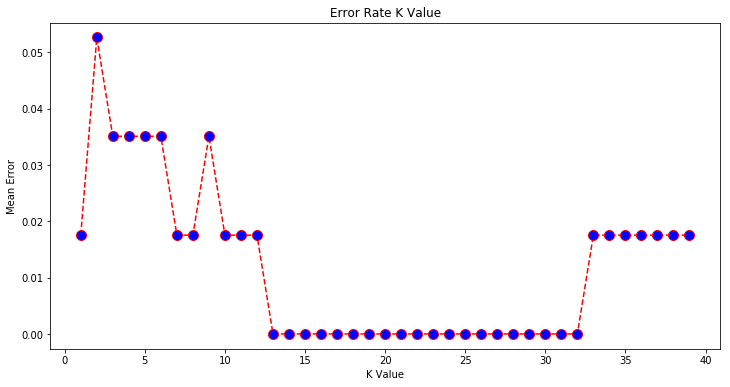

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')

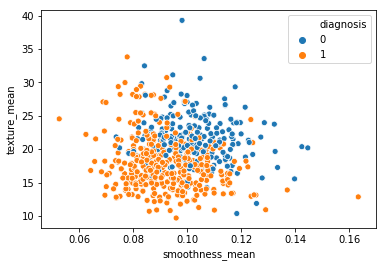

In [52]:
import seaborn as sns
sns.scatterplot(x = "smoothness_mean", y = "texture_mean", hue="diagnosis", data=data)

In [51]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

# Clasification with MLP

In [31]:
# MLP 
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(solver='adam', alpha=1e-5,
                    hidden_layer_sizes=(3, 2), random_state=1)
ann.fit(train_x, train_y)    
ann.score(train_x, train_y)

/home/aria/.local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.896484375

In [32]:
ann.score(test_x,test_y)

0.9298245614035088

In [33]:
data.cov()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,0.234177,-1.244954,-0.864145,-8.732438,-120.738222,-0.002440,-0.015246,-0.026864,-0.014583,-0.004384,...,-1.816042,-1.358959,-12.730868,-202.184994,-0.004657,-0.044997,-0.066592,-0.025243,-0.012463,-0.002831
radius_mean,-1.244954,12.418920,4.907582,85.447142,1224.483409,0.008454,0.094197,0.190128,0.112475,0.014273,...,16.513749,6.433100,114.288570,1888.227223,0.009625,0.229249,0.387386,0.172393,0.035746,0.000450
texture_mean,-0.864145,4.907582,18.498909,34.439759,485.993787,-0.001415,0.053767,0.103692,0.048977,0.008419,...,7.329267,24.110148,51.745933,841.283832,0.007611,0.188010,0.270110,0.083491,0.027942,0.009260
perimeter_mean,-8.732438,85.447142,34.439759,590.440480,8435.772345,0.070836,0.714714,1.387234,0.802360,0.121922,...,113.858063,45.258113,792.328208,13026.148359,0.083526,1.742478,2.858506,1.231848,0.284300,0.022391
area_mean,-120.738222,1224.483409,485.993787,8435.772345,123843.554318,0.876178,9.264931,19.244924,11.241958,1.459596,...,1637.521341,621.824934,11341.789807,192192.557633,0.992514,21.616602,37.634415,16.701789,3.125809,0.023756
smoothness_mean,-0.002440,0.008454,-0.001415,0.070836,0.876178,0.000198,0.000490,0.000585,0.000302,0.000215,...,0.014487,0.003118,0.112879,1.655299,0.000259,0.001045,0.001276,0.000465,0.000343,0.000127
compactness_mean,-0.015246,0.094197,0.053767,0.714714,9.264931,0.000490,0.002789,0.003718,0.001703,0.000873,...,0.136643,0.080544,1.047413,15.323436,0.000682,0.007194,0.008994,0.002831,0.001667,0.000656
concavity_mean,-0.026864,0.190128,0.103692,1.387234,19.244924,0.000585,0.003718,0.006355,0.002850,0.001094,...,0.265181,0.146934,1.954350,30.682405,0.000817,0.009469,0.014704,0.004513,0.002020,0.000741
concave points_mean,-0.014583,0.112475,0.048977,0.802360,11.241958,0.000302,0.001703,0.002850,0.001506,0.000492,...,0.155721,0.069819,1.116016,17.886881,0.000401,0.004075,0.006091,0.002321,0.000902,0.000258
symmetry_mean,-0.004384,0.014273,0.008419,0.121922,1.459596,0.000215,0.000873,0.001094,0.000492,0.000752,...,0.024609,0.015274,0.201896,2.765725,0.000267,0.002041,0.002481,0.000775,0.001187,0.000217


In [36]:
data.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,-0.596534,-0.696360,-0.776614,-0.330499,...,-0.776454,-0.456903,-0.782914,-0.733825,-0.421465,-0.590998,-0.659610,-0.793566,-0.416294,-0.323872
radius_mean,-0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,-0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,-0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,-0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,-0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,-0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,-0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
